In [16]:
import pip
pip.main(['install','missingno'])


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: missingno in c:\users\carmo\anacanda\lib\site-packages (0.5.2)

Requirement already satisfied: seaborn in c:\users\carmo\anacanda\lib\site-packages (from missingno) (0.12.2)

Requirement already satisfied: matplotlib in c:\users\carmo\anacanda\lib\site-packages (from missingno) (3.7.0)

Requirement already satisfied: scipy in c:\users\carmo\anacanda\lib\site-packages (from missingno) (1.10.0)

Requirement already satisfied: numpy in c:\users\carmo\anacanda\lib\site-packages (from missingno) (1.23.5)

Requirement already satisfied: cycler>=0.10 in c:\users\carmo\anacanda\lib\site-packages (from matplotlib->missingno) (0.11.0)

Requirement already satisfied: packaging>=20.0 in c:\users\carmo\anacanda\lib\site-packages (from matplotlib->missingno) (22.0)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\carmo\anacanda\lib\site-packages (from matplotlib->missingno) (4.25.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\carmo\anacanda\lib\site-packages (from matplotlib->missingno) (3.0.9)

Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\carmo\anacanda\lib\site-packages (from matplotlib->missingno) (1.4.4)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\carmo\anacanda\lib\site-packages (from matplotlib->missingno) (2.8.2)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\carmo\anacanda\lib\site-packages (from matplotlib->missingno) (1.0.5)

Requirement already satisfied: pillow>=6.2.0 in c:\users\carmo\anacanda\lib\site-packages (from matplotlib->missingno) (9.4.0)

Requirement already satisfied: pandas>=0.25 in c:\users\carmo\anacanda\lib\site-packages (from seaborn->missingno) (1.5.3)

Requirement already satisfied: pytz>=2020.1 in c:\users\carmo\anacanda\lib\site-packages (from pandas>=0.25->seaborn->missingno) (2022.7)

Requirement already satisfied: six>=1.5 in c:\users\carmo\anacanda\lib\site-packages (from python-dateutil>=2.7->matplotlib->missingno) (1.16.0)

0

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats



sales_data = pd.read_csv(r"C:\Users\carmo\OneDrive\Documents\Projects\Python\vgsales.csv")\

sales_data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
# Missing data
# . = df . column 

sales_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [21]:
# What genre of games have been made the most

sales_data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

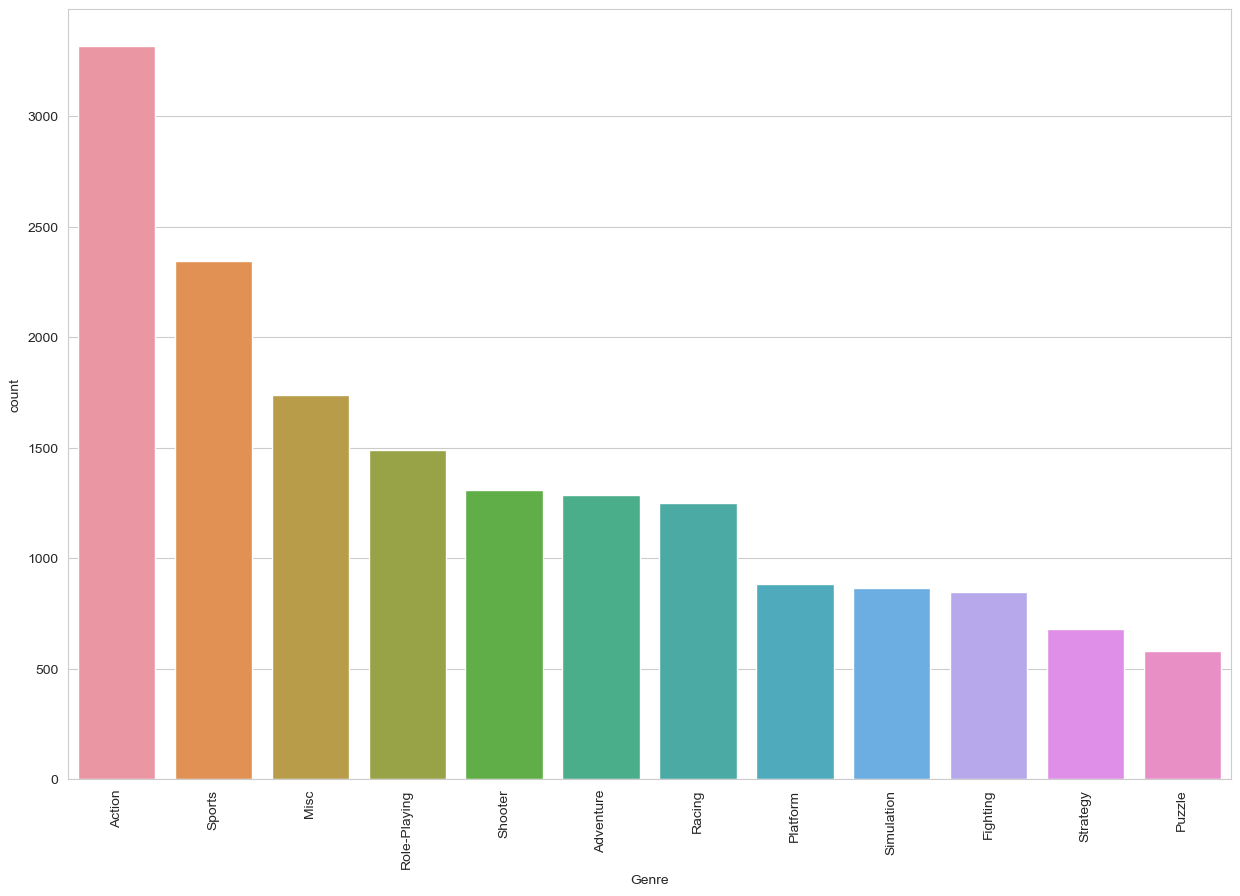

In [27]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=sales_data, order = sales_data['Genre'].value_counts().index)
plt.xticks(rotation=90)

In [21]:
# WHICH GENRE SOLD THE MOST PER YEAR

#pandas.DataFrame.groupby
#DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True)[source]
#parameter- BY : mapping, function/label

#groups the year and genre values that match the rows in global_sales

grouped_sales = sales_data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# top genre contains True/False values to show the max global_sales goupby year = True or False  

top_genre = grouped_sales.groupby(by=['Year'])['Global_Sales'].transform(max) == grouped_sales['Global_Sales']

#contains grouped_sales[filtered by top_genre]. reset 
genres_per_year = grouped_sales[top_genre].reset_index(drop=True)


print(genres_per_year)

      Year         Genre  Global_Sales
0   1980.0       Shooter          7.07
1   1981.0        Action         14.84
2   1982.0        Puzzle         10.03
3   1983.0      Platform          6.93
4   1984.0       Shooter         31.10
5   1985.0      Platform         43.17
6   1986.0        Action         13.74
7   1987.0      Fighting          5.42
8   1988.0      Platform         27.73
9   1989.0        Puzzle         37.75
10  1990.0      Platform         22.97
11  1991.0      Platform          7.64
12  1992.0      Fighting         15.25
13  1993.0      Platform         18.67
14  1994.0      Platform         28.74
15  1995.0      Platform         16.69
16  1996.0  Role-Playing         43.96
17  1997.0        Racing         31.91
18  1998.0        Sports         41.79
19  1999.0  Role-Playing         49.09
20  2000.0        Sports         41.19
21  2001.0        Action         59.39
22  2002.0        Action         86.77
23  2003.0        Action         67.93
24  2004.0        Action 

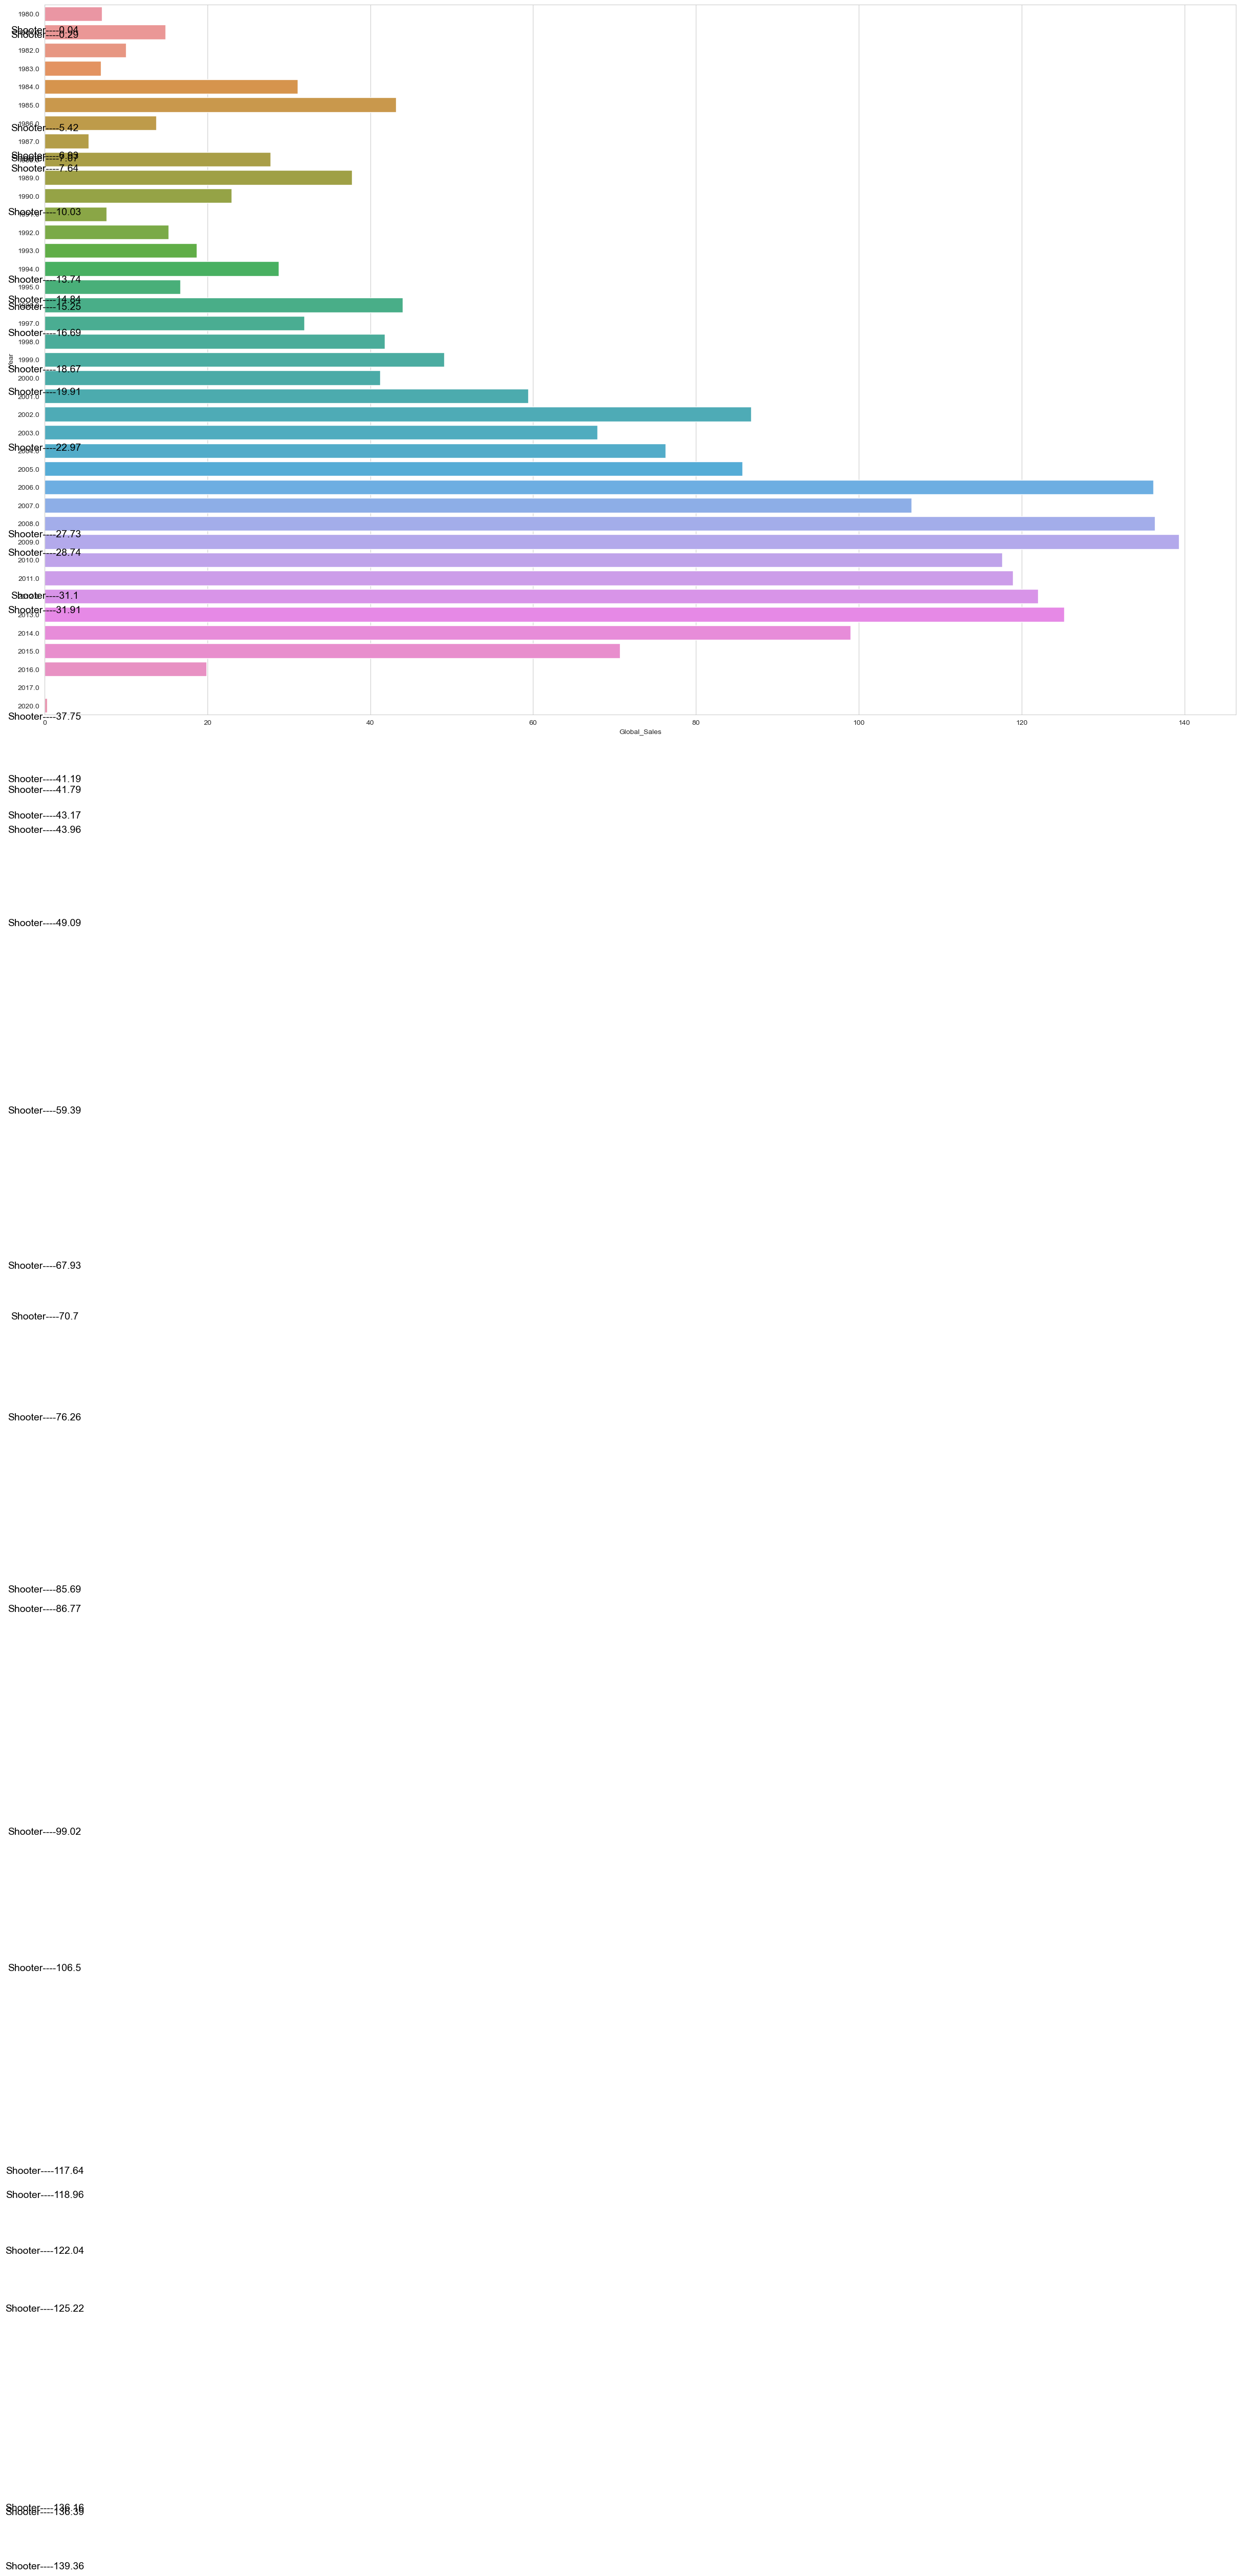

In [59]:
#Plotting 

genre = genres_per_year['Genre']


#General plotting line to plot various charts - set the size

plt.figure(figsize=(30, 18))

#SNS aka seaborn
#sns.barplot(x=df.values_var, y=df.group_var, orient='h')
g_desc = genres_per_year.sort_values('Year',ascending=False)
g = sns.barplot(x='Global_Sales', y='Year', data=g_desc, orient='h')
index = 0

# Display "settings for the values
# chat name= g 


for value in genres_per_year['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 0, ha="center")
    index += 0
    
plt.xticks(rotation=0)
plt.show()
